In [1]:
import ternausnet
import ternausnet.models
import numpy as np
from PIL import Image
import io

import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim import Adam
import matplotlib.pyplot as plt

In [2]:

def load_model(path, device='cpu'): # Check for GPU or CPU
    x = ternausnet.models.UNet11(pretrained=True) 
    model = x
    optimizer = Adam(model.parameters(), lr=0.001)
    checkpoint = torch.load(path, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    model = model.to(device)

    return model


In [3]:

def get_masked_image(uploaded_file, model, device='cpu'): # Check for GPU or CPU
    input_image = Image.open(uploaded_file)
    if input_image.mode != 'RGB':
        input_image = Image.merge("RGB", (input_image, input_image, input_image))
    transform = transforms.Compose([
        transforms.ToTensor(),

    ])
    input_tensor = transform(input_image).unsqueeze(0).to(device)

    model.eval()  
    with torch.no_grad():
        output_tensor = model(input_tensor)
        output_tensor = torch.sigmoid(output_tensor)
    output_numpy = output_tensor.squeeze().cpu().numpy() # Check for GPU or CPU
    print(np.unique(output_numpy, return_counts=True ))
    output_numpy = (output_numpy).astype(np.uint8)
    output_image = Image.fromarray(output_numpy * 255)

    return output_image


In [4]:


def mask_images(uploaded_files, checkpoint_path, device):
    segmented_files = []
    model = load_model(checkpoint_path, device)
    for uploaded_file in uploaded_files:
        segmented_file = get_masked_image(uploaded_file, model, device)
        segmented_files.append(segmented_file)
    return segmented_files

c:\Users\DELL\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\DELL\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(array([0.00000000e+00, 3.06247614e-39, 3.39432884e-39, 3.53800957e-39,
       3.61062626e-39, 3.69650484e-39, 4.00609371e-39, 4.23864479e-39,
       4.29217720e-39, 4.83367255e-39, 5.81013936e-39, 5.90105140e-39,
       6.01326318e-39, 6.16356926e-39, 6.73479176e-39, 6.83792593e-39,
       7.08103159e-39, 7.75518787e-39, 7.78892694e-39, 8.57079403e-39,
       8.81995190e-39, 9.32120057e-39, 9.35282927e-39, 9.39165505e-39,
       9.92546989e-39, 1.01744218e-38, 1.02200901e-38, 1.11553349e-38,
       1.22203722e-38, 1.32424372e-38, 1.40432583e-38, 1.45316613e-38,
       1.99017130e-38, 2.11679754e-38, 2.11805758e-38, 2.13242356e-38,
       2.18592569e-38, 2.20095322e-38, 2.31785178e-38, 2.41589152e-38,
       2.55849326e-38, 3.14383272e-38, 3.17887780e-38, 3.68104123e-38,
       3.73644296e-38, 3.81455891e-38, 3.89472355e-38, 3.93609633e-38,
       4.00058268e-38, 4.01492301e-38, 4.47237997e-38, 4.84824550e-38,
       5.16510542e-38, 5.70252637e-38, 5.80777173e-38, 6.36332716e-38,
     

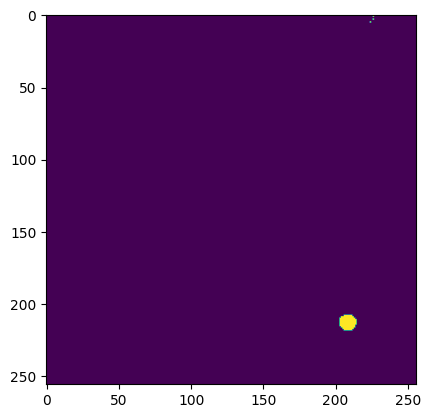

In [5]:
model = load_model('model/model_2.pth')
input_image_path = 'statics/sample_image.png'
output_image = get_masked_image("C:/Users/DELL/Desktop/DLA/Hackathon/WebApp/statics/00.png", model)
plt.imshow(output_image)
plt.show()